In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('../data/tickets_featured.csv')

## Pré-processamento e KMeans

In [13]:
# 2. Selecionar apenas as colunas numéricas de interesse para clustering
features = ['peso_urgencia', 'peso_origem', 'tempo_espera_norm', 'score_priorizacao']
X = df[features]

In [14]:
# 3. Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# 4. Aplicar o KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [16]:
# 5. Análise dos clusters
# Ver a média das features em cada cluster
cluster_summary = df.groupby('cluster')[features + ['tempo_espera']].mean()
print(cluster_summary)

         peso_urgencia  peso_origem  tempo_espera_norm  score_priorizacao  \
cluster                                                                     
0             2.260434     2.085247           0.754457          15.145366   
1             2.104550     2.091965           0.237163          12.948502   
2             8.000000     1.791549           0.485994          36.836386   
3             2.098361     1.099636           0.504402          12.250456   

         tempo_espera  
cluster                
0          150.627952  
1           48.721200  
2           97.740845  
3          101.367213  


## Visualização dos Clusters

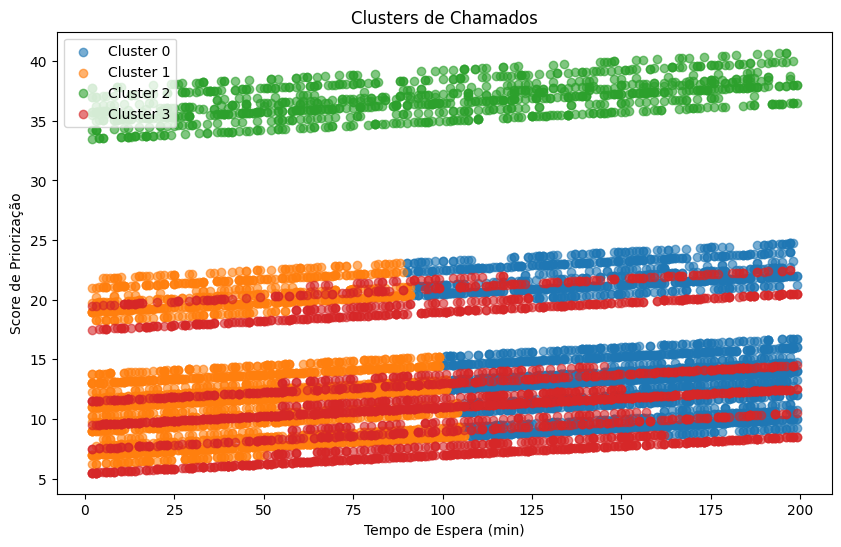

In [17]:
# 6. Visualização dos clusters
plt.figure(figsize=(10,6))
for c in sorted(df['cluster'].unique()):
    plt.scatter(
        df[df['cluster'] == c]['tempo_espera'],
        df[df['cluster'] == c]['score_priorizacao'],
        label=f'Cluster {c}',
        alpha=0.6
    )
plt.xlabel('Tempo de Espera (min)')
plt.ylabel('Score de Priorização')
plt.title('Clusters de Chamados')
plt.legend()
plt.show()


In [18]:
# 7. Recomendação: mostrar os chamados prioritários de cada cluster (top 3 por cluster)
for c in sorted(df['cluster'].unique()):
    print(f"\nTop chamados prioritários do Cluster {c}:")
    display(df[df['cluster'] == c].sort_values('score_priorizacao', ascending=False).head(3)[
        ['id', 'urgencia', 'cliente', 'tipo_servico', 'tempo_espera', 'score_priorizacao']
    ])


Top chamados prioritários do Cluster 0:


,id,urgencia,cliente,tipo_servico,tempo_espera,score_priorizacao
9592,9593,Alta,Cliente K,TV,198,24.734772
2901,2902,Alta,Cliente F,Nuvem,197,24.719543
9370,9371,Alta,Cliente G,Internet,197,24.719543



Top chamados prioritários do Cluster 1:


,id,urgencia,cliente,tipo_servico,tempo_espera,score_priorizacao
1452,1453,Alta,Cliente D,Nuvem,88,23.059645
8582,8583,Alta,Cliente H,Internet,87,23.044416
3980,3981,Alta,Cliente A,Nuvem,86,23.029188



Top chamados prioritários do Cluster 2:


,id,urgencia,cliente,tipo_servico,tempo_espera,score_priorizacao
140,141,Crítica,Cliente J,Internet,196,40.704315
5312,5313,Crítica,Cliente L,TV,196,40.704315
4840,4841,Crítica,Cliente E,Nuvem,194,40.673858



Top chamados prioritários do Cluster 3:


,id,urgencia,cliente,tipo_servico,tempo_espera,score_priorizacao
137,138,Alta,Cliente K,TV,197,22.469543
6295,6296,Alta,Cliente A,Internet,197,22.469543
627,628,Alta,Cliente D,Internet,195,22.439086
